In [15]:
from sklearn.datasets import load_boston
boston=load_boston()
#print(boston.DESCR)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(boston.data)
boston_transformed=scaler.transform(boston.data)
print(boston_transformed.shape)
print(boston.target.shape)

from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(boston.data,boston.target,train_size=0.75,random_state=1999)


(506, 13)
(506,)


In [26]:
n_neighbors=3
import numpy as np

def regressor(n_neighbors,array):
    k=0
    evaluator=np.zeros(len(x_train))
    collector=np.zeros(n_neighbors)
    for i in range(len(x_train)):
        evaluator[i]=np.linalg.norm(array-x_train[i])
    for i in range(len(evaluator)):
        if((evaluator[i]==min(evaluator))&(k<n_neighbors)):
            collector[k]=y_train[i]
            k=k+1
            evaluator[i]=100000000000
    return(np.mean(collector))       

In [27]:
prediction=np.zeros(len(x_test))
for i in range(len(x_test)):
    prediction[i]=regressor(n_neighbors,x_test[i])
print(prediction)
print(y_test)

[  8.4          6.86666667  10.6          5.8          5.7          7.93333333
   6.36666667  18.83333333  16.66666667  22.06666667   9.6         22.5
  24.9          9.03333333  12.83333333  16.66666667  14.8         24.46666667
  14.26666667   6.4          6.8          6.66666667  14.1          6.2
  14.26666667   5.83333333  18.63333333   7.7          8.36666667
  13.96666667  16.03333333   4.53333333   5.66666667   8.1          4.76666667
   1.66666667  15.8          4.43333333  14.6         24.43333333
   4.53333333   7.          12.43333333  18.2         22.06666667
   6.36666667  22.06666667  11.43333333   4.6          7.13333333
  17.16666667  23.73333333  13.13333333   6.46666667   9.96666667   7.2
   5.06666667  23.           4.53333333  22.53333333  21.76666667   9.3
  24.76666667   6.83333333  29.8          6.3          7.66666667  25.9
   7.93333333   7.23333333  10.06666667  12.83333333  16.66666667
  12.06666667  38.7         16.9         12.16666667   6.76666667
   6.26

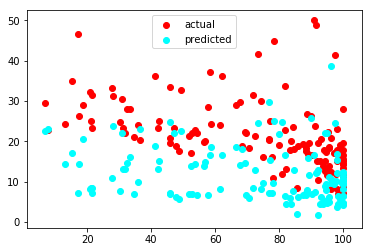

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,6],y_test,color='red')
plt.scatter(x_test[:,6],prediction,color='cyan')
plt.legend(['actual','predicted'])
plt.show()
